In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [2]:
#Reading from CSV File and Storing in Dataframe
X_train = pd.read_csv('../../Dataset/x_train_all.csv')
y_train = pd.read_csv('../../Dataset/y_train_all.csv')
X_test = pd.read_csv('../../Dataset/x_test_all.csv')
y_test = pd.read_csv('../../Dataset/y_test_all.csv')

In [3]:
#Printing the shapes of the training
print("========================================")
print("=   Shape to train and test Dataset    =")
print("========================================")
print("= Shape of X_train is  :", X_train.shape)
print("= Shape of y_train is  :", y_train.shape)
print("= Shape of X_test is   :", X_test.shape)
print("= Shape of y_test is   :", y_test.shape)
print("========================================")

=   Shape to train and test Dataset    =
= Shape of X_train is  : (9690, 2304)
= Shape of y_train is  : (9690, 1)
= Shape of X_test is   : (3090, 2304)
= Shape of y_test is   : (3090, 1)


In [4]:
clf = ExtraTreesClassifier(random_state=42)

In [5]:
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesClassifier(random_state=42)

In [6]:
y_train_pred = clf.predict(X_train)

In [7]:
train_predictions = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on Training Set: {train_accuracy}")

Accuracy on Training Set: 1.0


In [8]:
y_test_pred = clf.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Set: ", accuracy)


Accuracy on Test Set:  0.7067961165048544


In [10]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.12      0.21        60
           1       0.71      0.80      0.75       720
           2       0.70      0.75      0.73       750
           3       0.66      0.68      0.67       450
           4       0.76      0.75      0.75       660
           5       0.86      0.50      0.63        60
           6       0.62      0.53      0.57        90
           7       0.93      0.22      0.35        60
           8       0.64      0.68      0.66       150
           9       0.72      0.48      0.57        90

    accuracy                           0.71      3090
   macro avg       0.76      0.55      0.59      3090
weighted avg       0.72      0.71      0.70      3090



In [11]:
# Calculating precision, recall, and F1-score for each class
precision = precision_score(y_test, y_test_pred, average=None)
recall = recall_score(y_test, y_test_pred, average=None)
f1 = f1_score(y_test, y_test_pred, average=None)

In [12]:
#Creating dataframe of precision, recall, and F1-score for each class
df = pd.DataFrame({'Precision': precision, 'F1 Score': f1, 'Recall': recall})
df

,Precision,F1 Score,Recall
0,1.000000,0.208955,0.116667
1,0.706388,0.749674,0.798611
2,0.703750,0.726452,0.750667
3,0.655319,0.669565,0.684444
4,0.758040,0.753998,0.750000
5,0.857143,0.631579,0.500000
6,0.623377,0.574850,0.533333
7,0.928571,0.351351,0.216667
8,0.637500,0.658065,0.680000
9,0.716667,0.573333,0.477778


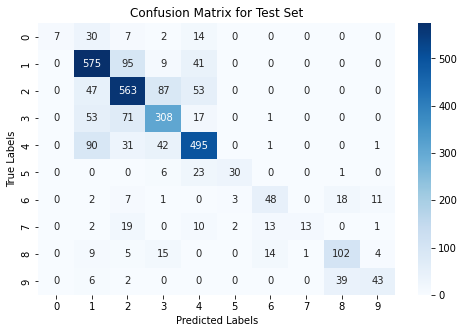

In [13]:
# Generate and visualize the confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [14]:
X_train_new_30, X_test_30 = train_test_split(X_train, test_size=0.3, random_state=42)
X_test_new_30 = pd.concat([X_test, X_test_30], ignore_index=True)

In [15]:
y_train_new_30, y_test_30 = train_test_split(y_train, test_size=0.3, random_state=42)
y_test_new_30 = pd.concat([y_test, y_test_30], ignore_index=True)

In [16]:
#Printing the shapes of the training
print("========================================")
print("=   Shape to train and test Dataset    =")
print("========================================")
print("= Shape of X_train is  :", X_train_new_30.shape)
print("= Shape of y_train is  :", y_train_new_30.shape)
print("= Shape of X_test is   :", X_test_new_30.shape)
print("= Shape of y_test is   :", y_test_new_30.shape)
print("========================================")

=   Shape to train and test Dataset    =
= Shape of X_train is  : (6783, 2304)
= Shape of y_train is  : (6783, 1)
= Shape of X_test is   : (5997, 2304)
= Shape of y_test is   : (5997, 1)


In [17]:
clf_30 = ExtraTreesClassifier(random_state=42)

In [18]:
clf_30.fit(X_train_new_30, y_train_new_30)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesClassifier(random_state=42)

In [19]:
y_train_pred_30 = clf.predict(X_train_new_30)

In [20]:
accuracy_train_30 = accuracy_score(y_train_new_30, y_train_pred_30)

In [21]:
print("Accuracy on Training Set: ", accuracy_train_30)

Accuracy on Training Set:  1.0


In [22]:
y_pred_30 = clf.predict(X_test_new_30)

In [23]:
accuracy_30 = accuracy_score(y_test_new_30, y_pred_30)
print("========================================")
print("= Accuracy is :", accuracy_30)
print("========================================")

= Accuracy is : 0.8489244622311155


In [24]:
# Classification Report
print(classification_report(y_test_new_30, y_pred_30))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76       135
           1       0.84      0.90      0.87      1385
           2       0.84      0.87      0.85      1428
           3       0.82      0.84      0.83       876
           4       0.87      0.87      0.87      1247
           5       0.95      0.77      0.85       131
           6       0.84      0.78      0.81       190
           7       0.99      0.62      0.76       125
           8       0.82      0.84      0.83       308
           9       0.88      0.73      0.80       172

    accuracy                           0.85      5997
   macro avg       0.88      0.78      0.82      5997
weighted avg       0.85      0.85      0.85      5997



In [25]:
# Calculating precision, recall, and F1-score for each class
precision_30 = precision_score(y_test_new_30, y_pred_30, average=None)
recall_30 = recall_score(y_test_new_30, y_pred_30, average=None)
f1_30 = f1_score(y_test_new_30, y_pred_30, average=None)


In [26]:
# Creating dataframe of precision, recall, and F1-score for each class
df_30 = pd.DataFrame({'Precision': precision_30, 'F1 Score': f1_30, 'Recall': recall_30})
df_30

,Precision,F1 Score,Recall
0,1.000000,0.755760,0.607407
1,0.838404,0.865922,0.895307
2,0.839648,0.854095,0.869048
3,0.819196,0.828442,0.837900
4,0.872581,0.870125,0.867682
5,0.952830,0.852321,0.770992
6,0.836158,0.806540,0.778947
7,0.987342,0.764706,0.624000
8,0.817610,0.830671,0.844156
9,0.880282,0.796178,0.726744


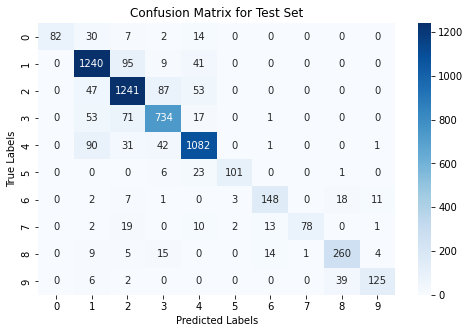

In [27]:
# Confusion Matrix
cm_30 = confusion_matrix(y_test_new_30, y_pred_30)
plt.figure(figsize=(8, 5))
sns.heatmap(cm_30, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_train_new_30), yticklabels=np.unique(y_test_new_30))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [28]:
X_train_new_60, X_test_60 = train_test_split(X_train, test_size=0.6, random_state=42)
X_test_new_60 = pd.concat([X_test, X_test_60], ignore_index=True)

In [29]:
y_train_new_60, y_test_60 = train_test_split(y_train, test_size=0.6, random_state=42)
y_test_new_60 = pd.concat([y_test, y_test_60], ignore_index=True)

In [30]:
clf_60 = ExtraTreesClassifier(random_state=42)
clf_60.fit(X_train_new_60, y_train_new_60)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesClassifier(random_state=42)

In [31]:
# Accuracy on Training Set
y_train_pred_60 = clf.predict(X_train_new_60)
accuracy_train_60 = accuracy_score(y_train_new_60, y_train_pred_60)
print("Accuracy on Training Set: ", accuracy_train_60)

Accuracy on Training Set:  1.0


In [32]:
y_pred_60 = clf.predict(X_test_new_60)

In [33]:
accuracy_60 = accuracy_score(y_test_new_60, y_pred_60)
print("========================================")
print("= Accuracy is :", accuracy_60)
print("========================================")

= Accuracy is : 0.8982479784366577


In [34]:
# Classification Report
print(classification_report(y_test_new_60, y_pred_60))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84       194
           1       0.89      0.93      0.91      2056
           2       0.89      0.91      0.90      2108
           3       0.88      0.89      0.89      1316
           4       0.91      0.91      0.91      1811
           5       0.97      0.84      0.90       189
           6       0.90      0.86      0.88       309
           7       0.99      0.77      0.87       204
           8       0.88      0.90      0.89       468
           9       0.92      0.81      0.86       249

    accuracy                           0.90      8904
   macro avg       0.92      0.86      0.88      8904
weighted avg       0.90      0.90      0.90      8904



In [35]:
# Finding precision, recall, and F1-score for each class
precision_60 = precision_score(y_test_new_60, y_pred_60, average=None)
recall_60 = recall_score(y_test_new_60, y_pred_60, average=None)
f1_60 = f1_score(y_test_new_60, y_pred_60, average=None)

In [36]:
# Creating dataframe of precision, recall, and F1-score for each class
df_60 = pd.DataFrame({'Precision': precision_60, 'F1 Score': f1_60, 'Recall': recall_60})
df_60

,Precision,F1 Score,Recall
0,1.000000,0.841791,0.726804
1,0.888837,0.908702,0.929475
2,0.890176,0.900609,0.911290
3,0.878743,0.885370,0.892097
4,0.912417,0.910650,0.908890
5,0.969512,0.900850,0.841270
6,0.902027,0.882645,0.864078
7,0.993671,0.867403,0.769608
8,0.878661,0.887949,0.897436
9,0.922374,0.863248,0.811245


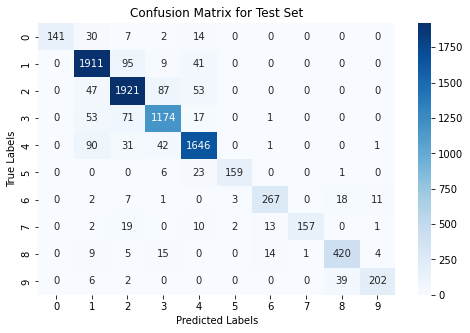

In [37]:
# Confusion Matrix
cm_60 = confusion_matrix(y_test_new_60, y_pred_60)
plt.figure(figsize=(8, 5))
sns.heatmap(cm_60, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_train_new_60), yticklabels=np.unique(y_test_new_60))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()